# Exercise 6

## physics718: Programming in Physics and Astronomy with C++ or Python (SS 2020)
Oliver Cordes & Thomas Erben

Homework is due on **Friday, 17/06/2020, 23:59pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers in case of problems.
 * Your code(s) needs to be well and appropriately commented!
 * All files of your solution should be in the same directory as this notebook including scripts, images, additional notebooks etc.
 * References to files in scripts and notebooks should be done with relative paths
 * Finally submit this notebook with your solutions in the nbgrader system
 
**Main topics of this exercise:**
 * *numpy* 2d-arrays 
 * animations with matplotlib
 * text files
 * python lists

Put in here your group number: 

Group 26

Since we have a discussion about the workload of homework exercises and projects, we need some feedback. Please write the amount of time you have spent for this homework, including repition of tutorial sessions exercises and videos for each person of your group.

Spent time: 
 * Member 1: 2 hours
 * Member 2: 1 hours
 * Member 3: 1 hours
 
Please don't write your names! We just need the amount of hours!

# 1. Thermal Conduction (in 2 dimensions) (30 Points)

**Reminder**

In the previous Exercise sheet we covered the 1 dimensional thermal conduction. There, we discretized 1 dimensional length *x* by introducing a vector and computed the second spatial derivative using this vector *i.e.* ( $u'' = \partial^2 u/\partial x^2$) by:

$${u'}_{i+1/2} \approx \frac{u_{i+1}-u_{i}}{h} \qquad {u'}_{i-1/2} \approx \frac{u_{i}-u_{i-1}}{h}$$
and obtained
$${u''}_{i} \approx \frac{u_{i-1}-2 u_i + u_{i+1}}{h^2}. $$
Similarly for the time discretization we introduced $ u_{t+\Delta t} = u_{t} + \Delta t \cdot \kappa^2 {u''_i}. $

## 1. 2-D Thermal Conduction

For the 2-dimensional thermal conduction problem we can assume a plate which has a unit length of 1 in both $x$ and $y$ directions and constant zero temperature is applied from the all 4 sides. Then we follow the same discretization logic. The thermal distribution in this case can be written as:

$$\frac{\partial u }{\partial t} = \kappa^2 \Delta u $$

with:

$$\Delta u = \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} $$

If we are doing the same discretization with $N$ parts in $x$ and $y$ we can write our simulation equation now for any part with the indicess $i$ and $j$:

$$ u_{t+\Delta t,i,j} = u_{t,i,j} + \Delta t \cdot \kappa^2 \frac{u_{t,i-1,j} + u_{t,i+1,j} -4 u_{t,i,j}  + u_{t,i,j-1} + u_{t,i,j+1}}{h^2} $$

The boundary conditions are now $u_{t,0,j} = u_{t,N-1,j} = u_{t,i,0} = u_{t,i,N-1} = 0$.


The limits of the simulation can be given for a proper $\Delta t < \frac{h^2}{2\kappa^2}$.

Similar to the 1d thermal conduction we can define one initial condition:

$$u(x,y,0) = \sin(\pi x) \sin(\pi y) $$ for which we know the exact solution:

$$u(x,y, t) = \sin(\pi x)\sin(\pi y) \textrm{e}^{-\kappa^2 \pi^2 t}$$



**Your task**:

Your task is to implement a simulation (re-evaluation of the values at different time steps) of a metal plate using a 2D *numpy* array with $N\times N$ with $N=32$ elements. You should setup the given initial conditions *i.e.* the temperature should be constant and equal to 0 at all times. <br>
Write again function *update_time* that takes a 2-D numpy array, $\kappa$ and $\Delta t$ values as inputs and computes the heat equation at $t+\Delta t$. The function again don't need a return value since you can modify the numpy array in place.

To prove again your function, you can run the *update_time* function for 10000 times ($\kappa = 1$ and $\Delta t = 0.0001$) and divide your result with the initial condition. Compare these results array with the output of the exponential part of the exact solution. The result should exactly the same as for the 1d thermal conduction.

For the task we need to iniate a grid with the given 2-D function. Numpy offers a function *meshgrid* that allows creating such grids. Using *meshgrid* one can first generate two seperate grids $xx$ and $yy$ which are the 2-D extensions of the 1-D vectors $x$ and $y$ and obtain the desired grid values by multiplying those matricies. The following code explains the usage of *meshgrid* by creating a multiplication table for values from 1 to 10:

In [2]:
import numpy as np

vector = np.arange(1,11)                           # create a 1d vector with the numbers from 1 to 10

# extend the vectors to a meshgrid
xx, yy = np.meshgrid(vector, vector)

print(xx)                                          # 10 x 10 version of x vector
print(yy)                                          # Notice for yy it is the transpose of these values

# multiply both vectors
matrix = xx * yy
print(matrix)

[[ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]
 [ 1  2  3  4  5  6  7  8  9 10]]
[[ 1  1  1  1  1  1  1  1  1  1]
 [ 2  2  2  2  2  2  2  2  2  2]
 [ 3  3  3  3  3  3  3  3  3  3]
 [ 4  4  4  4  4  4  4  4  4  4]
 [ 5  5  5  5  5  5  5  5  5  5]
 [ 6  6  6  6  6  6  6  6  6  6]
 [ 7  7  7  7  7  7  7  7  7  7]
 [ 8  8  8  8  8  8  8  8  8  8]
 [ 9  9  9  9  9  9  9  9  9  9]
 [10 10 10 10 10 10 10 10 10 10]]
[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72

You can create your initial grid with this method and update it with a function call.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


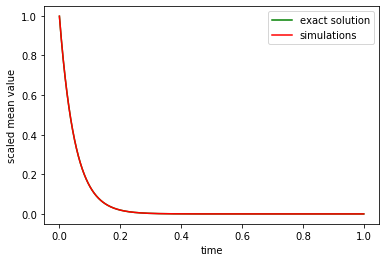

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#define a function that update the heat_grid
def update_time(grid, kappa, deltat):
    
    #interior of the heat grid
    middle = grid[1:-1,1:-1]
    
    #shifted in four directions
    left=grid[1:-1,:-2]
    right=grid[1:-1,2:]
    up=grid[:-2,1:-1]
    down=grid[2:,1:-1]
    
    #update the interior of the grid, the boundary is left unchanged
    grid[1:-1,1:-1]=middle+deltat*(kappa**2)*(left+right+up+down-4*middle)/(h**2)
    return
        
        
# main program
# YOUR CODE HERE

#initialize values
N=32
h=1/(N-1)
kappa=1
deltat=0.0001

#set up an 1d-vector that has the value sin(\pi h i) for i from 0 to N-1
vector = np.sin(np.arange(N)*h*np.pi)
vector[-1]=0

#meshgrid to create the desired heat grid
xx, yy = np.meshgrid(vector, vector)
initial_grid= xx*yy
heat_grid=xx*yy

#initialize mean value array for each time step
mean=np.zeros(10000)

#update 10000 times
for i in range(10000):
    update_time(heat_grid, kappa, deltat)   
    
    #divide by inital grid
    scaled=heat_grid/initial_grid
    
    #calculate mean value of the interior of the scaled grid, put it in the mean value array
    mean[i]=scaled[1:-1,1:-1].mean()

#time array
time=(np.arange(10000)+1)/10000

#exact solution
exact=np.exp(-2*(kappa**2)*(np.pi**2)*time)

#plot exact and simulated solutions
p1=plt.plot(time,exact,color='green',label='exact solution')
p2=plt.plot(time,mean,color='red',label='simulations')

#show legend and axis labels
plt.legend()
plt.xlabel('time')
plt.ylabel('scaled mean value')
plt.show(p1,p2)




nbgrader tests

In [4]:
N = 11
heat_grid = np.zeros((N,N), dtype=np.float64)

# set initial values
heat_grid[N//2,N//2] = 1.
# print(heat_grid)

kappa = 1.
deltat= 0.0001

for i in range(5000):
    update_time(heat_grid, kappa, deltat)

assert(np.abs(np.exp(-2.*((np.pi)**2)*deltat*5000)-heat_grid[N//2,N//2]) < 1e-4)

## 2. External sources

The given equations are useful for relaxing processes without any additional external sources. External heat sources $f(x,t)$ can be added on the right side of the equations:

$$\frac{\partial u }{\partial t} = \kappa^2 \Delta u + f(x,t) $$

and for the discrete solution:

$$ u_{t+1,i,j} = u_{t,i,j} + \Delta t \cdot \kappa^2 \frac{u_{t,i-1,j} + u_{t,i+1,j} -4 u_{t,i,j}  + u_{t,i,j-1} + u_{t,i,j+1}}{h^2} + f_{t,i,j} $$

For this task we want to simulate constant external sources at certain discrete positions. Our external sources will be represented by a list of $M$ points $P_i = [x_i, y_i, v_i]$ with $i=0...M-1$ and $x_i$ and $y_i$ the discrete coordinates of this point and $v_i$ the constant value to set. At these positions we keep the values at *v_i* at all times by setting it to the same value after every time step.
This *pumps* heat into our simulated plate. Since the borders are set to zero the heat is more or less vanishing at the border. And after certain steps we will gain an equilibrium in our thermal distribution, if the external sources have a limit, which means a certain amount of energy per time unit!

**Your task**:

* write a function *init_heat_grid* in which you put in some external heat sources, the function should take the grid, the list of points as described as parameters *i.e.*  $P_i = [x_i, y_i, v_i]$. Points are not allowed to be on the border of the grid, because 
the border should be zero for all times. Ignore these unwanted points.
* extend your previous defined function *update_time* to a new function *update_time_points*, now allowing it to take the list of points as an additional parameter. The job of the function is the same as before but you should add the external sources after the calculation step. 
* run the simulation for a $N\times N$ grid ($N=32$) with a single external source in the middle of the grid with a value of 10 until you reach an equilibrium. <br>Print out the numbers of iterations and create a plot with the final heat distribution. You can use the same $\kappa$ and $\Delta t$ values as before.

**Hints**:
* the Points can be used as a list of lists with each sub-list having  $x$, $y$ and $v$.
* You can test for the equilibrium, by summing the difference between the each point of the grid and the grid from the previous step. This sum should be smaller than 1e-4
* for plotting the final distribution use *plt.imshow* and *plt.colorbar* (have a look at these functions and choose a proper colormap!)

3636


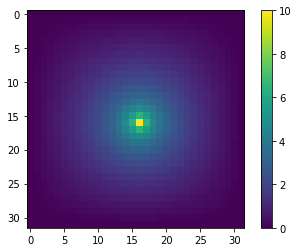

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#define a function that put external heat sources into the grid
def init_heat_grid(grid, point):
    
    #loop through each point in the set of points
    for i in range(len(point)):
        
        #find x and y coordinates of the point
        x=point[i][0]
        y=point[i][1]
        
        #ignore points on the boundary
        if (x!=0) & (x!=(N-1)) & (y!=0) & (y!=(N-1)):
            
            #set grid point to external constant temperature
            grid[x,y] = point[i][2]
    return

#define a function that update the grid with constant temperature sources
def update_time_points(grid1, kappa, deltat, point):
    
    #same as before
    middle = grid1[1:-1,1:-1]
    left=grid1[1:-1,:-2]
    right=grid1[1:-1,2:]
    up=grid1[:-2,1:-1]
    down=grid1[2:,1:-1]
    grid1[1:-1,1:-1]=middle+deltat*(kappa**2)*(left+right+up+down-4*middle)/(h**2)
    
    #set constant value to the external sources
    init_heat_grid(grid1,point)
    return

#initialize values
N=32
h=1/(N-1)
kappa = 1
deltat=0.0001

#create a heat grid
vector = np.sin(np.arange(N)*h*np.pi)
vector[-1]=0

xx, yy = np.meshgrid(vector, vector)
initial_grid= xx*yy
heat_grid=xx*yy

#set external heat source to be in the middle            
points = [[N//2,N//2,10]]

#put it in the heat grid
init_heat_grid(heat_grid, points)

#store the initial grid to the temporary variable last_grid
last_grid=np.copy(heat_grid)

#update the heat grid and count interation 1
update_time_points(heat_grid, kappa, deltat, points)
iteration=1

#while loop, stop when the differences sum up to a value smaller than 10^(-4)
while np.sum(np.abs(heat_grid-last_grid))>10**(-4):
    
    #store the initial grid to the temporary variable last_grid
    last_grid=np.copy(heat_grid)
    
    #update and add 1 to interation
    update_time_points(heat_grid, kappa, deltat, points)
    iteration=iteration+1
    
#print iterations
print(iteration)

#show equilibrium plot with color bar
plt.imshow(heat_grid)
plt.colorbar()
plt.show()
    
    



nbgrader tests

In [6]:
# initials
N = 7
heat_grid = np.zeros((N,N), dtype=np.float64)

points = [[N//3, N//3, 20], [N//3,2*N//3, 20], [2*N//3,N//3,20], [2*N//3,2*N//3,20]]

init_heat_grid(heat_grid, points)

assert(heat_grid[2,2] == 20.)
assert(heat_grid[2,4] == 20.)
assert(heat_grid[4,2] == 20.)
assert(heat_grid[4,4] == 20.)

heat_grid = np.zeros((N,N), dtype=np.float64)

points = [[0,0,20], [N-1,N-1,20]]
init_heat_grid(heat_grid, points)
assert(heat_grid[0,0] == 0.)
assert(heat_grid[N-1,N-1] == 0.)

## 3. Animation

After we have done some initial setups we can go on with the animation. For this task we can use the widget ```clear_output``` from ```IPython.display``` package. Making use of this function, we will create heatmaps at each time step and clear the previous frame which will lead to a nice continues flow of images. <br>

**The Code Recipe:**

We are going to use the functions from the previous exercises to place heat sources at desired points on the grid. <br>
We need to write a function that; 
- Clears any previous image
- Creates a figure that is large enough to display nice images.
- Should take ```heat_grid``` data, ```kappa```, ```deltat``` and an array with the external source locations on the grid.
- Displays the data with proper axis, labels, colorbar etc.
- After the display, the function should update the time step by calling the proper function as in previous tasks.

Later, create points to place external sources. Initiate the grid with proper setup. 

**Your tasks**:
* Write a function ```animate_frame``` following the recipe.
* Setup three different sets of external sources, one with 2 and one with 4 points placed symmetrically in the center. The third set is left to your choice for experimenting. 
* Call your function for 50 times and display the animation.
* Try different point set and enjoy!

**Hints**:

 * For tests you can use also different combinations for *kappa* and *timestep*. The whole simulation is only working if the change from frame to frame is small due to the discretization of the plate and time. If kappa multiplied by timestep is too large, then you will see no proper simulation but a rather oscillating state which has nothing to do with reality! Set $\kappa=1$, $N=32\times32$ and choose a time step of $\Delta t=0.0001$ for the proper results.
 * You can create a figure with ```matplotlib.pyplot.figure()``` and adjust the figure size with its arguments.
 * Explore the different colormaps and choose a proper one for displaying such experiment.
 * Explore the ```matplotlib.pyplot.imshow``` arguments. ```vmin, vmax``` are useful for constraining the colorbar colors.

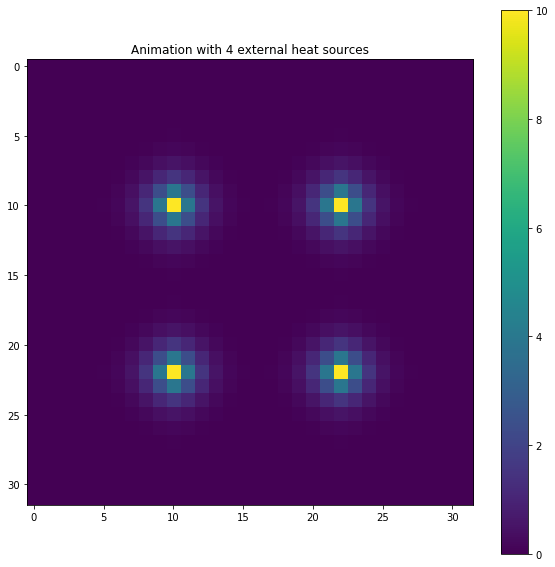

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

#define a function that clears previous output, creates a figure, shows the color plot and then updates the heat grid.
def animate_frame(grid, kappa, deltat, point):
    
    #clear output with wait function to minimize lapses
    clear_output(wait=True)
    
    #create figure with size (10,10)
    plt.figure(figsize=(10, 10))
    
    #color plot of the heat grid
    plt.imshow(grid,origin='upper')
    
    #shows title with the number of external sources
    plt.title('Animation with {} external heat sources'.format(len(point)))
    
    #show color bar
    plt.colorbar()
    plt.show()
    
    #update the heat grid
    update_time_points(grid, kappa, deltat, point)
    return

# main program
# YOUR CODE HERE

#initialize values, three sets of points
N=32
points1=[[10,10,10],[22,22,10]]
points2=[[10,10,10],[22,22,10],[10,22,10],[22,10,10]]
points3=[[10,10,10]]

#initialize heat grid with all zeros
heat_grid=np.zeros((N,N))

#put the external sources into the grid, here we choose the second set of points
init_heat_grid(heat_grid, points2)

#update 50 times to produce animation
for k in range(50):
    animate_frame(heat_grid, kappa, deltat, points2)
    
    

# 2. Word doubling (20 Points)

When writing a text, we often make the mistake to repeat a word.

   ```
   When typing longer texts, we often often make the mistake to
   repeat individual words such as here here.

   ```
   
Write a program in a notebook cell which reads a text file and marks positions with such mistakes. You should print lines and linenumbers with double words. Consider also cases where a word doubling occurs directly before and after a line break.

You can find a short example text for test purposes [here](double_words.txt).

**Note:**
An obvious ansatz for the problem is to read a line, to split it according to spaces, tabulators and line breaks and to perform the double word test. This, however is no complete solution to the problem! Consider again the above example:

   ```
   ... such as here here.
   ```
   
The double word `here` would not be recognised because the second one is directly followed by a dot (end of sentence mark). There are similar issues with other punctuation marks such as semicolons, parentheses and so on. See the following cell for a possibility to take this into account.

**Example:** The [example text](double_words.txt) gives the follwing output with my code:
```
Repetition in line 1. Word "often" at position 6!
Repetition in line 2. Word "here" at position 6!
Repetition of the first word "words" on line 5. It occured at the end of the previous (non-empty) line!
Repetition of the first word "test" on line 9. It occured at the end of the previous (non-empty) line!

```

**Hints**: 

We had introduced regular expressions in the tutorial sessions, which can be used from the Python module ```re```. Using regular expressions can help to split a given string into word avoiding to have punctuations and other non wanted characters in the results.

In [57]:
import re  # for the regular expressions

# YOUR CODE HERE

#read the txt file into text
text=open('double_words.txt','r').read()

#separete the text by line breaks and put each line as a string into a list
lines=re.split('\n',text)

#initialize two empty lists to store the start and end words of each line
start_words=[]
end_words=[]

#loop through each line
for i in range(len(lines)):
    
    #split the string by space into words and put each word into a list
    words=re.split('\s',lines[i])
    
    #initialize an empty list to store words without punctuations
    new_words=[]
    
    #loop through each word to strip out punctuations
    for word in words:
        
        #eliminate punctuations and put the new word into the list new_words
        w=re.sub(r'[^\w]','',word)
        new_words.append(w)
        
    #loop through the list new_words without going to the last word
    for j in range(len(new_words)-1):
        
        #check for double words
        if new_words[j]==new_words[j+1]:
            
            #calculate first position of the double word
            position=j+1
            
            #store the double word
            repetition=new_words[j]
            
            #print the repetition
            print('Repetition in line {}. Word "{}" at position {}!'.format(i+1,repetition,position))
            
    #store the start word of each line into the list start_words
    start_word=new_words[0]
    start_words.append(start_word)
    
    #same for end word
    end_word=new_words[len(new_words)-1]
    end_words.append(end_word)

#loop through every start words except the first one
for i in range(1,len(start_words)):
    
    #ignore empty lines
    if start_words[i]!='':
        
        #slice the end words up to the previous line of the current line of the start word
        matches=end_words[:i]
        
        #eliminate empty elements ''
        matches=list(filter(None,matches))
        
        #see if the last non-empty element of end_words is the same as the current start word
        if matches[-1]==start_words[i]:
            
            #print the repetition
            print('Repetition of the first word "{}" on line {}. It occured at the end of the previous (non-empty) line!'.format(start_words[i],i+1))


Repetition in line 1. Word "often" at position 6!
Repetition in line 2. Word "here" at position 6!
Repetition of the first word "words" on line 5. It occured at the end of the previous (non-empty) line!
Repetition of the first word "test" on line 9. It occured at the end of the previous (non-empty) line!
